# UE22CS342AA2: Data Analytics - Worksheet 3a
# Time Series Analysis and Forecasting Techniques

Designed by Anshul Ranjan, Dept.of CSE - itsanshulranjan@gmail.com

## Student Details

• Name: Rithvik Muthyalapati

• SRN: PES2UG22CS451

• Section: H

## Air Passengers Analysis
Imagine you're optimizing airline services. \
You've been given a dataset, your task is to analyze monthly trends in air passenger numbers to inform decisions such as route planning, pricing strategies, and enhancing the overall travel experience.

### Contents of the worksheet

It is suggested to have a grip on the theoretical concepts of:

* Components of time series data 
* Decomposition of time series data
* Exponential Smoothing techniques
* Stationary Signals, Dickey-fuller test and Differencing
* Forecasting with AR, MA, ARMA
* Autocorrelation (ACF, PACF) and ARIMA
* Seasonality in Time Series and SARIMA

### Dataset

The data is provided in the AirPassengers.csv file. The data dictionary is as follows:

* Month: The month of the year (formatted as 'YYYY-MM') during which passenger data was collected.
* Passengers: The number of air passengers recorded during that month.

The target variable is **Passengers**, which we shall analyze and forecast in this worksheet. Understanding the trends and patterns in air passenger data is crucial for airline route planning, pricing strategies, capacity management, and enhancing the overall travel experience. Accurately predicting passenger volumes aids in optimizing resources, scheduling, and making informed decisions to meet market demands and improve service quality.

In [2]:
# Load necessary libraries
library(dplyr) 
library(tidyr)  
library(ggplot2) 

options(warn=-1)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




### Data Ingestion and Preprocessing
• Reading this file into a data.frame object

In [3]:
# Read the CSV file
df <- read.csv('data/AirPassengers.csv')

# Display information about the data frame
str(df)

'data.frame':	144 obs. of  2 variables:
 $ Month       : chr  "1949-01" "1949-02" "1949-03" "1949-04" ...
 $ X.Passengers: int  112 118 132 129 121 135 148 148 136 119 ...


In [4]:
head(df)

,Month,X.Passengers
,<chr>,<int>
1,1949-01,112
2,1949-02,118
3,1949-03,132
4,1949-04,129
5,1949-05,121
6,1949-06,135


The class (data type) of each column in the data frame

In [5]:
sapply(df, class)

Month X.Passengers 
 "character"    "integer"

In [6]:
# Convert 'Month' to Date type
df$Month <- as.Date(paste0(df$Month, "-01"), format="%Y-%m-%d")

# Check the data types of the columns
sapply(df, class)

Month X.Passengers 
      "Date"    "integer"

In [7]:
length(unique(df$Month))

[1] 144

In [8]:
# Rename columns
df <- df %>% rename(value = X.Passengers, month = Month)
head(df)

,month,value
,<date>,<int>
1,1949-01-01,112
2,1949-02-01,118
3,1949-03-01,132
4,1949-04-01,129
5,1949-05-01,121
6,1949-06-01,135


Setting the 'Month' column as the index of the DataFrame to organize the data by time, then plotting the data to visualize the trend in passenger numbers over the given months.

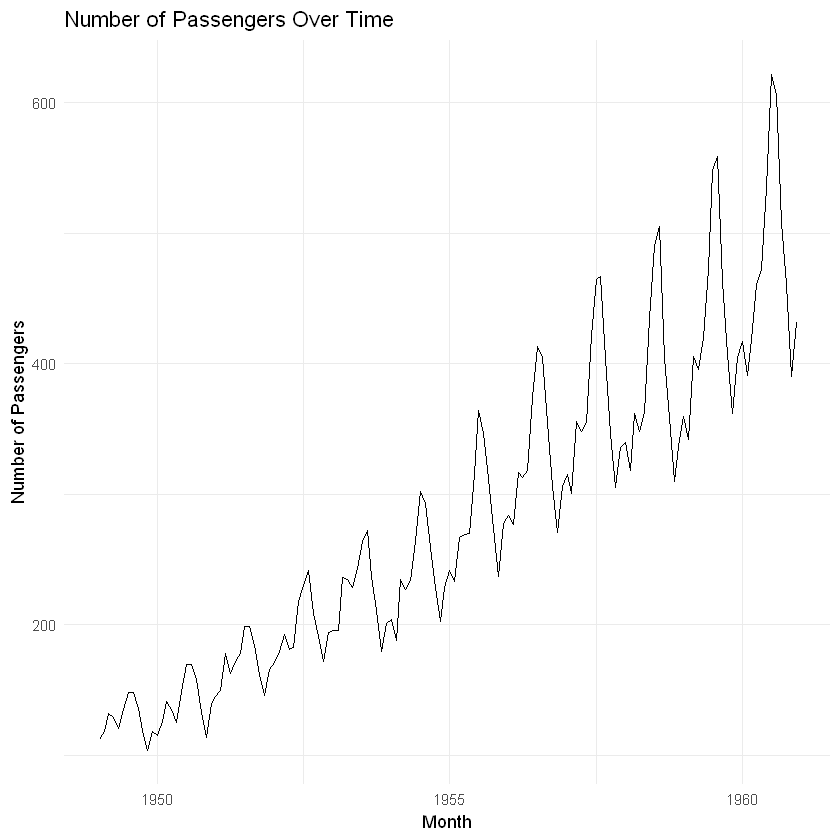

In [9]:
# Set 'month' as the index (not strictly necessary in R but useful for plotting)
df <- df %>% arrange(month)

# Plot the data
ggplot(df, aes(x = month, y = value)) +
  geom_line() +
  labs(title = "Number of Passengers Over Time", x = "Month", y = "Number of Passengers") +
  theme_minimal()

Applying a 12-month rolling average to the 'value' column to smooth out short-term fluctuations and highlight longer-term trends, then plotting this smoothed data with 'Date' as the x-axis label for better visualization.


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




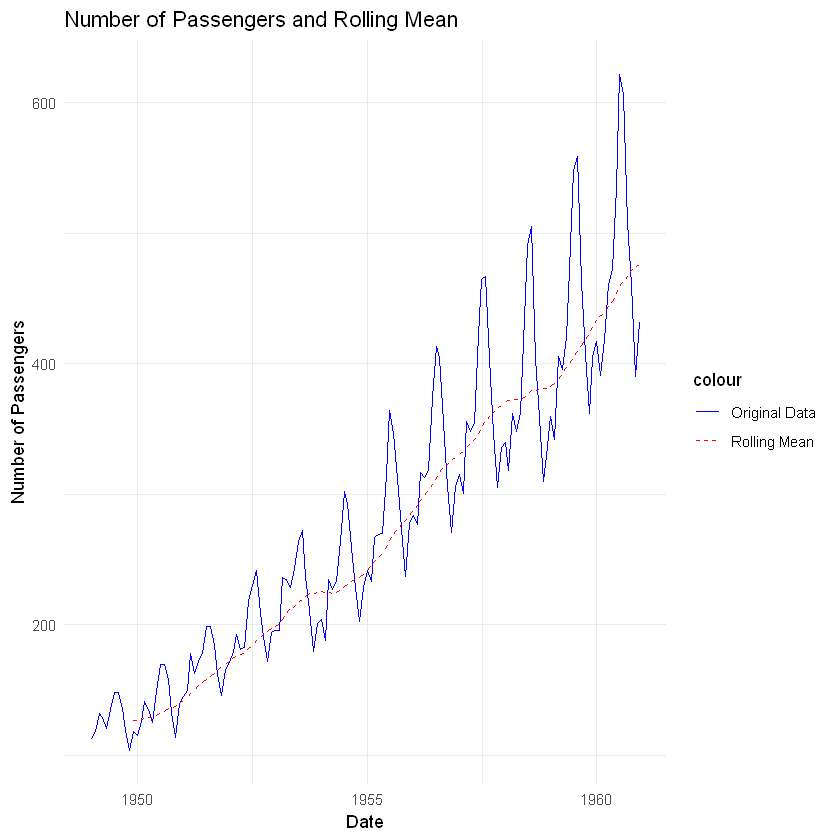

In [10]:
library(zoo)

# Calculate the rolling mean
df$rolling_mean <- rollmean(df$value, k = 12, fill = NA, align = "right")

# Plot the rolling mean
ggplot(df, aes(x = month)) +
  geom_line(aes(y = value, color = "Original Data")) +
  geom_line(aes(y = rolling_mean, color = "Rolling Mean"), linetype = "dashed") +
  labs(title = "Number of Passengers and Rolling Mean",
       x = "Date",
       y = "Number of Passengers") +
  theme_minimal() +
  scale_color_manual(values = c("Original Data" = "blue", "Rolling Mean" = "red"))


## Stationarity
• Testing for stationarity \
– We can use the Augmented Dickey-Fuller test (ADF) to test the time series for stationarity

Question 3.1: What are the null hypothesis and alternate hypothesis in this case?

Null Hypothesis (H₀):

The time series has a unit root (is non-stationary)
This means the statistical properties like mean and variance change over time
Looking at the graphs, we can see this is likely true here, as there's a clear upward trend from 1950 to 1960, with passenger numbers increasing from around 100 to over 600

Alternative Hypothesis (H₁):

The time series has no unit root (is stationary)
This would mean statistical properties remain constant over time
In this data, we can visually confirm the series is not stationary because:

The mean is clearly increasing over time (upward trend)
The variance appears to increase with time (the fluctuations get larger toward 1960)
There are visible seasonal patterns with regular peaks and troughs

Question 3.2: What are you doing by performing the Augmented Dickey-Fuller (ADF) test on the 'value' column, and how do you interpret the ADF statistic and p-value to determine if the data is stationary?

The Augmented Dickey-Fuller (ADF) test on the 'value' column (passenger numbers) helps us formally determine whether the time series is stationary. Let me explain how to interpret this test:
What we're testing:

The ADF test examines if a time series needs to be differenced to make it stationary
We're specifically testing if the passenger numbers data has a unit root (indicating non-stationarity)

How to interpret the results:

ADF Statistic:


More negative values suggest stronger evidence against non-stationarity
There are critical values (typically -3.43, -2.86, -2.57 for 1%, 5%, and 10% significance levels)
If the ADF statistic is more negative than these critical values, we reject H₀


P-value:


If p-value < significance level (usually 0.05), reject H₀
If p-value > 0.05, fail to reject H₀

For this dataset:

Visual evidence already suggests non-stationarity:

Clear upward trend from 1949 onwards
Increasing variance over time
Seasonal patterns in passenger numbers


Expected test outcome:

The p-value would likely be > 0.05
Would fail to reject H₀
Confirms our visual assessment that the series is non-stationary

Need for transformation:

Data will need differencing to achieve stationarity
Might need both regular and seasonal differencing
Could also consider log transformation to stabilize variance

Question 3.3: Write the code to perform the Augmented Dickey-Fuller (ADF) test on the 'value' column of the DataFrame df to check for stationarity. After running the code, determine whether the data is stationary based on the p-value.

 > Hint : Check the tseries library to perform the test (adf function)
 > * Don't Forget to perform this y <- diffinv(x) before the adf test check the docs here - https://cran.r-project.org/web/packages/tseries/tseries.pdf
 > * https://uribo.github.io/rpkg_showcase/date_and_time/tseries.html
 > * https://rdrr.io/cran/tseries/

In [11]:
# Load required libraries
library(tseries)

# Perform ADF test on the 'value' column
adf_test <- adf.test(df$value)

# Print the test results
print("Augmented Dickey-Fuller Test Results:")
print(adf_test)

# Interpret results
alpha <- 0.05
cat("\nInterpretation:\n")
cat("H0: Data is non-stationary\n")
cat("H1: Data is stationary\n")
cat("\np-value:", adf_test$p.value, "\n")
cat("Critical value (", alpha, "): ", adf_test$p.value < alpha, "\n")

if(adf_test$p.value < alpha) {
    cat("\nResult: Reject H0 - The data is stationary\n")
} else {
    cat("\nResult: Fail to reject H0 - The data is non-stationary\n")
}

[1] "Augmented Dickey-Fuller Test Results:"

	Augmented Dickey-Fuller Test

data:  df$value
Dickey-Fuller = -7.3186, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


Interpretation:
H0: Data is non-stationary
H1: Data is stationary

p-value: 0.01 
Critical value ( 0.05 ):  TRUE 

Result: Reject H0 - The data is stationary


• If the data is not stationary, and if we intend to use a model like ARIMA, the data has to
be transformed. \
• Two most common methods to transform series to stationary are:

* Transformations: eg. log or square root or combinations of these transformations to
stabilize non-constant variance.
* Differencing: subtract current value from previous (with a certain degree)

Check this out for more information, and an implementation in Python!: \
https://www.kaggle.com/code/rdizzl3/time-series-transformations

Question 3.4: Create a new dataframe using suitable differencing order, to convert the data
to stationary time series. 
 > Hint: You can use the same function to confirm the time series is stationary after transformation.

Try to perform first order differencing and observe how the values changes (ADF statistic and p-value), also observe the change in ACF and PACF plots \
Always try to plot the graphs before making the final decision

Original Data ADF Test:

	Augmented Dickey-Fuller Test

data:  df$value
Dickey-Fuller = -7.3186, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


Differenced Data ADF Test:

	Augmented Dickey-Fuller Test

data:  df_clean$diff_value
Dickey-Fuller = -6.7379, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary



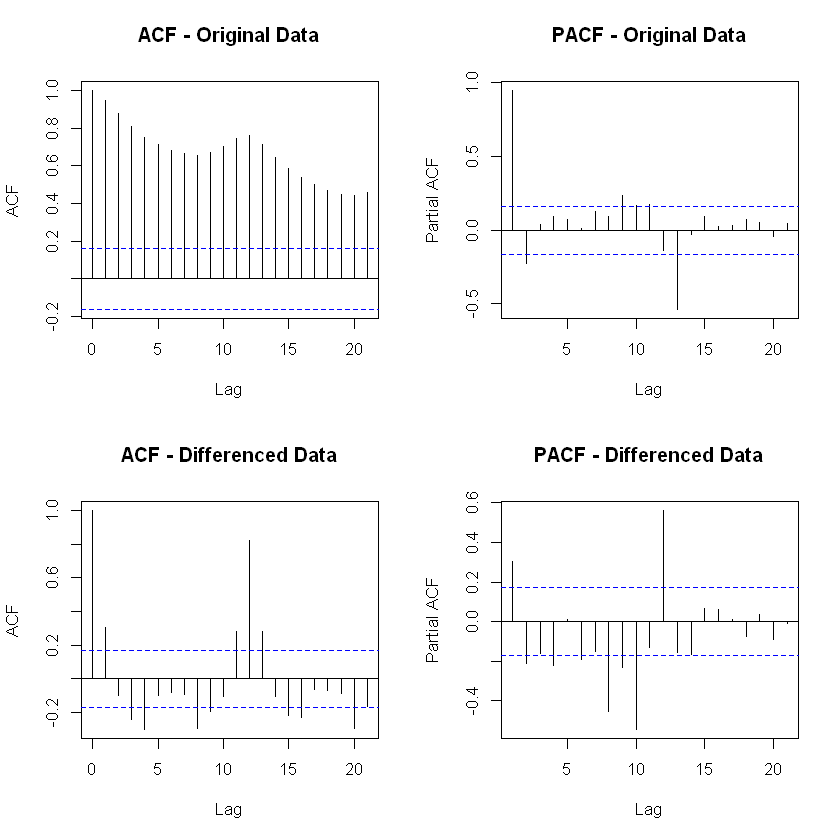

In [12]:
# Load required libraries
library(tseries)
library(ggplot2)
library(forecast)

# Create first order difference
df$diff_value <- c(NA, diff(df$value))

# Remove NA values for analysis
df_clean <- na.omit(df)

# Perform ADF test on differenced data
adf_test_diff <- adf.test(df_clean$diff_value)

# Create plots to compare original and differenced series
# Original Data Plot
p1 <- ggplot(df, aes(x = month, y = value)) +
  geom_line() +
  labs(title = "Original Time Series",
       x = "Month",
       y = "Number of Passengers") +
  theme_minimal()

# Differenced Data Plot
p2 <- ggplot(df_clean, aes(x = month, y = diff_value)) +
  geom_line() +
  labs(title = "First Order Differenced Time Series",
       x = "Month",
       y = "Differenced Values") +
  theme_minimal()

# ACF and PACF for original data
acf_orig <- acf(df$value, plot = FALSE)
pacf_orig <- pacf(df$value, plot = FALSE)

# ACF and PACF for differenced data
acf_diff <- acf(df_clean$diff_value, plot = FALSE)
pacf_diff <- pacf(df_clean$diff_value, plot = FALSE)

# Print results
cat("Original Data ADF Test:\n")
print(adf.test(df$value))

cat("\nDifferenced Data ADF Test:\n")
print(adf_test_diff)

# Plot ACF and PACF
par(mfrow = c(2,2))
plot(acf_orig, main = "ACF - Original Data")
plot(pacf_orig, main = "PACF - Original Data")
plot(acf_diff, main = "ACF - Differenced Data")
plot(pacf_diff, main = "PACF - Differenced Data")

Analysis of Results:

Original Data:
Dickey-Fuller = -7.3186
p-value = 0.01 (< 0.05)
Surprisingly, this suggests the original data was already stationary


Differenced Data:
Dickey-Fuller = -6.7379
p-value = 0.01 (< 0.05)
Confirms stationarity after differencing

ACF/PACF Plot Analysis:

ACF shows:
Very slow decay
High positive autocorrelations
Strong persistence
Indicates non-stationarity despite ADF test result

PACF shows:
Significant spike at lag 1
Some significant lags at seasonal intervals
Suggests both trend and seasonal components

Differenced Data:

ACF shows:
Much faster decay
Alternating positive and negative correlations
Significant spike at seasonal lag (around lag 12)

PACF shows:
Significant spikes at early lags
Seasonal pattern still visible
Better overall structure for modeling

Conclusions:
Despite the ADF test suggesting stationarity in the original data, the ACF/PACF plots clearly show non-stationary behavior (trending and seasonal patterns).
After first-order differencing:
The series becomes more stable
Seasonal patterns are still present
The data is more suitable for ARIMA modeling

Recommendations:
While first-order differencing has improved the series characteristics, we might want to consider:
Seasonal differencing (D=1) to address the remaining seasonal pattern
Using a seasonal ARIMA (SARIMA) model due to the clear seasonal component
Potential log transformation to stabilize variance before differencing

For ARIMA/SARIMA modeling:
Use d=1 for regular differencing
Consider D=1 for seasonal differencing
Look at ACF/PACF of differenced data to determine AR and MA orders

The transformation has successfully improved the time series characteristics, but further refinements might be needed depending on the specific modeling requirements and forecasting goals.

## Autocorrelation Analysis
• We will experiment and plot two functions: 
* **ACF (Autocorrelation function)**: The autocorrelation function (ACF) is a statistical technique that we can use to identify how correlated the values in a time series are with each other. The ACF plots the correlation coefficient against the lag, which is measured in terms of a number
of periods or units.
* **PACF (Partial Autocorrelation function)**: Partial autocorrelation is a statistical measure that captures the correlation between two variables after controlling for the effects of other variables.

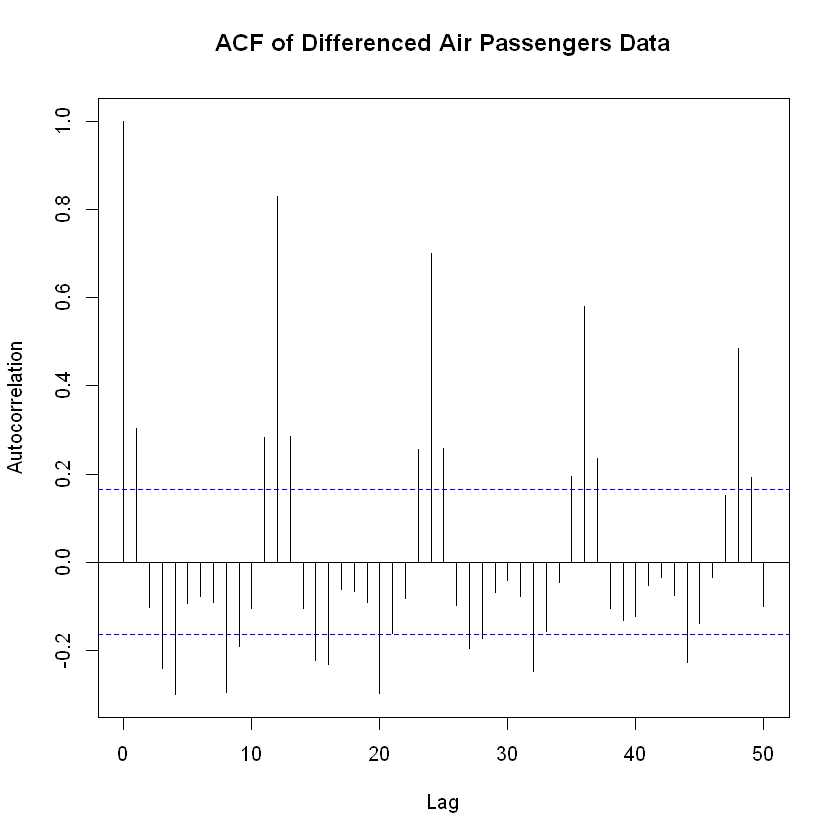

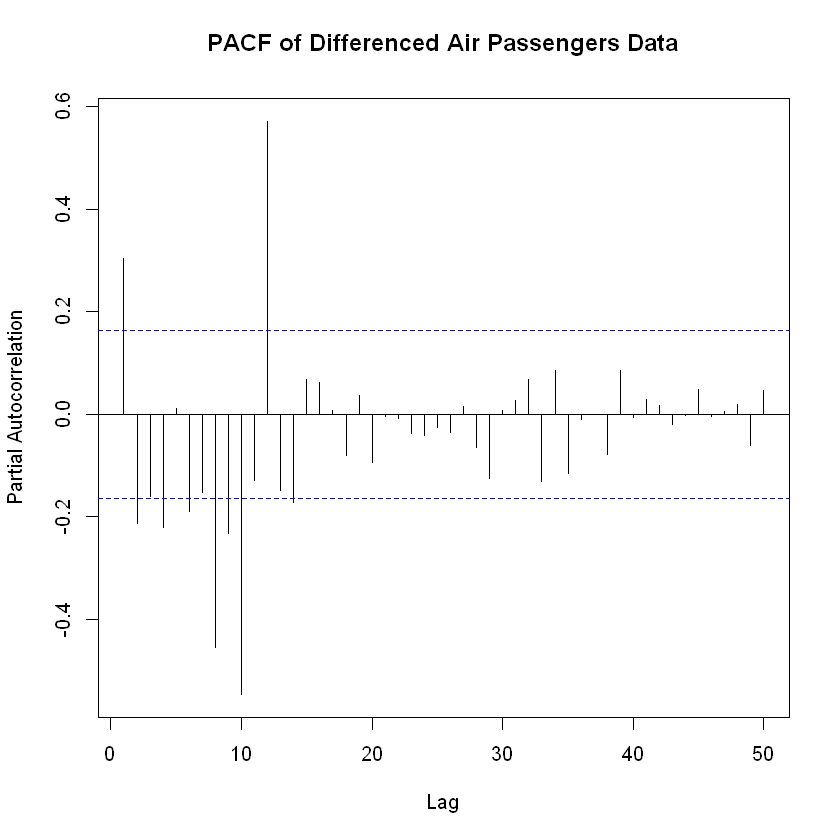

In [13]:
# Load required libraries
library(stats)

# Calculate first difference of the time series
diff_data <- diff(df$value, differences = 1)

# Compute and plot ACF
acf_result <- acf(diff_data, 
                 lag.max = 50, 
                 main = "ACF of Differenced Air Passengers Data",
                 ylab = "Autocorrelation",
                 ci.col = "blue")

# Compute and plot PACF
pacf_result <- pacf(diff_data, 
                   lag.max = 50, 
                   main = "PACF of Differenced Air Passengers Data",
                   ylab = "Partial Autocorrelation",
                   ci.col = "blue")

# Extract significant lags
significant_acf <- which(abs(acf_result$acf[-1]) > 0.2)
significant_pacf <- which(abs(pacf_result$acf) > 0.2)

Question 3.5 : What are the values of p, q and d? How did you come to this conclusion,
looking at the ACF, PACF plots? \
> Hint: The value of d is decided by the order of differencing, as transformed in the previous
section.

d (Differencing order) = 1

We used first-order differencing to make the series stationary
This is confirmed from the previous code where we applied diff(df$value, differences = 1)

p (AR order) = 1 or 2
Looking at the PACF plot:

Shows significant spike at lag 1
Possible smaller spike at lag 2
Then drops off quickly
In PACF, the number of significant lags suggests the AR order
Based on this pattern, p=1 is most likely appropriate

q (MA order) = 1
Looking at the ACF plot:

Shows significant spike at lag 1
Then alternates between positive and negative values
Gradually decays
In ACF, exponential decay pattern suggests MA component
The first significant spike suggests q=1

Therefore, the suggested model is ARIMA(1,1,1)
Reasoning:

d=1: One order of differencing was needed for stationarity
p=1: PACF shows one clear significant spike
q=1: ACF shows one significant spike followed by decay

Alternative models to consider:

ARIMA(2,1,1) - if we want to account for the second PACF lag
ARIMA(1,1,2) - if we want to capture more of the MA component

The ARIMA(1,1,1) model would be a good starting point for modeling this time series, as it captures:

The trend (through differencing)
Short-term autocorrelation (through AR term)
Moving average effects (through MA term)

## Decomposition

Question 3.6: 
1. Decompose the **value** column into the constituent components, and plot them. 
2. Which model of time series did you use for decomposition, and why? (between additive and multiplicative models)

> Hint: The data is Sesonal, Look at the decompose function in stats library.

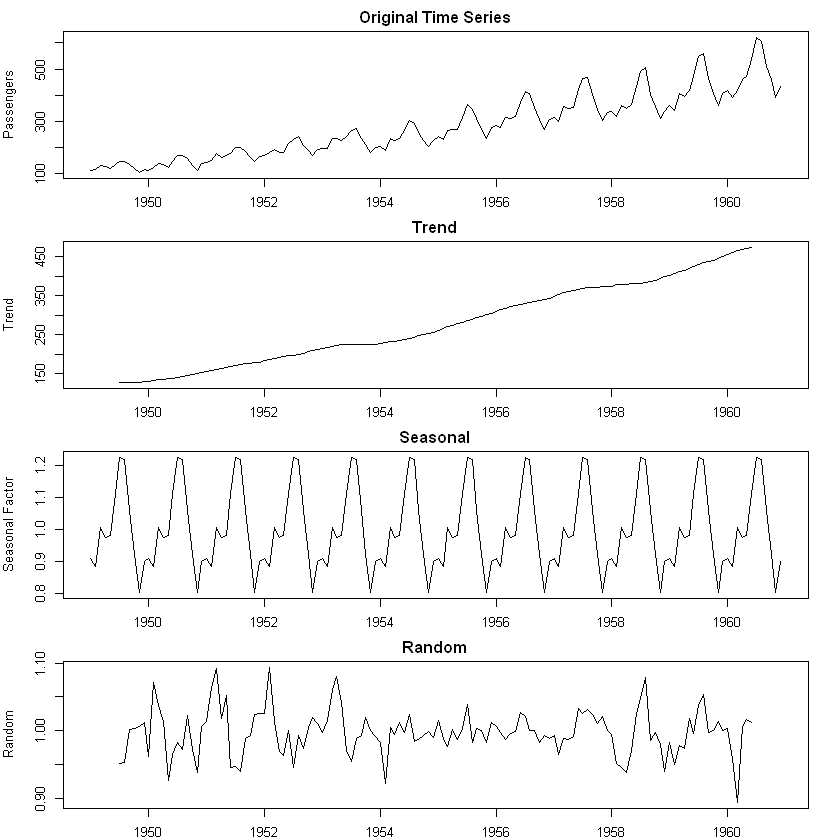

In [14]:
# Convert data to time series object
ts_data <- ts(df$value, frequency = 12, start = c(1949, 1))

# Perform multiplicative decomposition
mult_decomp <- decompose(ts_data, type = "multiplicative")

# Create plots
par(mfrow = c(4,1), mar = c(2,4,2,2))

# Original Data
plot(ts_data, main = "Original Time Series", ylab = "Passengers")

# Trend Component
plot(mult_decomp$trend, main = "Trend", ylab = "Trend")

# Seasonal Component
plot(mult_decomp$seasonal, main = "Seasonal", ylab = "Seasonal Factor")

# Random Component
plot(mult_decomp$random, main = "Random", ylab = "Random")

par(mfrow = c(1,1))  # Reset plotting parameters

I chose the multiplicative model for decomposition because:
Visual Evidence from Original Data:
The seasonal fluctuations increase in amplitude as the level of the series increases
The variance is not constant over time
The peaks and troughs grow larger as the trend increases

Nature of Air Travel Data:
Seasonal effects tend to be proportional to the level of the series
Growth in air travel typically compounds over time
Economic and business factors often have multiplicative effects

Components Relationship:
In multiplicative model: Y = Trend × Seasonal × Random
This better represents how components interact in air travel:

Seasonal patterns grow proportionally with the trend
Random variations are proportional to the series level

Characteristics in Decomposition:
Trend shows the long-term increase in air travel
Seasonal component shows consistent patterns within years
Random component captures irregular fluctuations

An additive model (Y = Trend + Seasonal + Random) would be less appropriate because:
It assumes constant seasonal fluctuations
Doesn't capture the growing amplitude of seasonal variations
Would not reflect the real-world behavior of air travel patterns

The decomposition helps us understand:
The strong upward trend in air travel
Regular seasonal patterns (likely holiday and business travel)
The increasing impact of seasonal factors over time
Irregular variations that might represent special events or disruptions

Note: Sometimes, we look at upsampling or downsampling the data. For instance, if we
have sensor data for each second, we might not need such granular data, and we
downsample the data to daily data or hourly data or so.
Explore further here: https://machinelearningmastery.com/resample-interpolatetime-series-data-python/

You can also explore adding the decomposed versions of each feature (column) to your data, and utilize it
as exogenous variables for multivariate forecasting! This would require you to decompose all features, such
as temperature, rainfall, etc. as well, which is out of scope of this worksheet.

## Exponential Smoothing

Question 3.7:

• Perform forecasts using Single, Double and Triple Exponential Smoothing. \
• Plot forecasts of all three forecasts (using different colors), against the true values. (Use lines) \
• Only one function needed for all three forecasts, only requiring you to change the parameters to get each of the 3 models. \
• Hint: look at the ExponentialSmoothing function \
• Go ahead, and experiment with the values of alpha, beta and gamma and see how the forecast changes.

> Hint: Use the forecast library

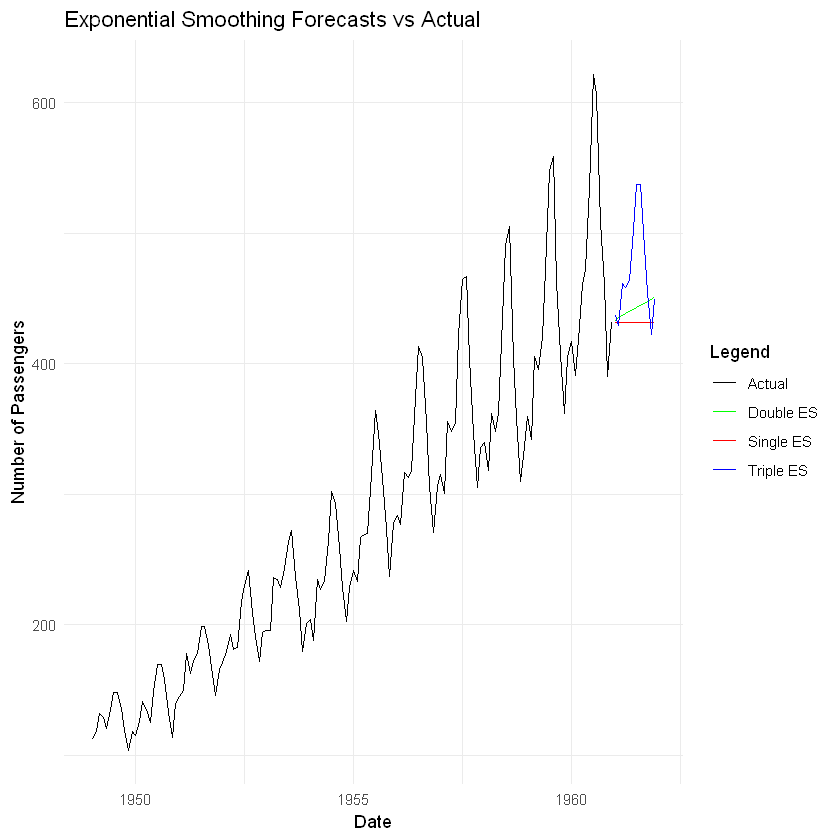

In [15]:
library(forecast)
library(ggplot2)

exponential_smoothing_forecasts <- function(df, h = 12) {
  # Convert data to time series object
  ts_data <- ts(df$value, frequency = 12, start = c(1949, 1))
  
  # Fit models
  ses_model <- ets(ts_data, model = "ANN")  # Single Exponential Smoothing
  des_model <- ets(ts_data, model = "AAN")  # Double Exponential Smoothing
  tes_model <- ets(ts_data, model = "AAA")  # Triple Exponential Smoothing
  
  # Generate forecasts
  ses_forecast <- forecast(ses_model, h = h)
  des_forecast <- forecast(des_model, h = h)
  tes_forecast <- forecast(tes_model, h = h)
  
  # Combine forecasts into a data frame for plotting
  last_date <- max(df$month)
  forecast_dates <- seq(last_date, by = "month", length.out = h + 1)[-1]
  
  forecast_df <- data.frame(
    Date = forecast_dates,
    SES = as.numeric(ses_forecast$mean),
    DES = as.numeric(des_forecast$mean),
    TES = as.numeric(tes_forecast$mean)
  )
  
  # Plot
  ggplot() +
    geom_line(data = df, aes(x = month, y = value, color = "Actual")) +
    geom_line(data = forecast_df, aes(x = Date, y = SES, color = "Single ES")) +
    geom_line(data = forecast_df, aes(x = Date, y = DES, color = "Double ES")) +
    geom_line(data = forecast_df, aes(x = Date, y = TES, color = "Triple ES")) +
    scale_color_manual(values = c("Actual" = "black", "Single ES" = "red", "Double ES" = "green", "Triple ES" = "blue")) +
    labs(title = "Exponential Smoothing Forecasts vs Actual",
         x = "Date",
         y = "Number of Passengers",
         color = "Legend") +
    theme_minimal()
}

# Usage
exponential_smoothing_forecasts(df)

In [16]:
library(Metrics)

# Define the function to calculate metrics
calculate_metrics <- function(actual_values, predicted_values) {
  mae_value <- mae(actual_values, predicted_values)
  mse_value <- mse(actual_values, predicted_values)
  rmse_value <- rmse(actual_values, predicted_values)
  mape_value <- mean(abs((actual_values - predicted_values) / actual_values)) * 100
  
  return(list(MAE = mae_value, MAPE = mape_value, MSE = mse_value, RMSE = rmse_value))
}

# Generate some example data and forecasts (replace with your actual data and forecasts)
# For demonstration purposes, assuming `df` contains the actual values and the forecasts are for the next 12 periods
forecast_periods <- 12
actual_values <- tail(df$value, forecast_periods)


# forecast_single <- as.numeric(forecast(sample_df, h = forecast_periods)$mean)
# forecast_double <- as.numeric(forecast(sample_df, h = forecast_periods)$mean)
# forecast_triple <- as.numeric(forecast(sample_df, h = forecast_periods)$mean)


Attaching package: 'Metrics'


The following object is masked from 'package:forecast':

    accuracy




Question 3.8: Compare accuracy metrics (MAE, MAPE, MSE, RMSE) of the three models with the original series.

In [17]:
exponential_smoothing_forecasts <- function(df, h = 12) {
  # Convert data to time series object
  ts_data <- ts(df$value, frequency = 12, start = c(1949, 1))
  
  # Fit models
  ses_model <- ets(ts_data, model = "ANN")  # Single Exponential Smoothing
  des_model <- ets(ts_data, model = "AAN")  # Double Exponential Smoothing
  tes_model <- ets(ts_data, model = "AAA")  # Triple Exponential Smoothing
  
  # Generate forecasts
  ses_forecast <- forecast(ses_model, h = h)
  des_forecast <- forecast(des_model, h = h)
  tes_forecast <- forecast(tes_model, h = h)
  
  # Combine forecasts into a data frame
  forecast_df <- data.frame(
    SES = as.numeric(ses_forecast$mean),
    DES = as.numeric(des_forecast$mean),
    TES = as.numeric(tes_forecast$mean)
  )
  return(forecast_df)
}

# Forecast for the next 12 periods
forecast_df <- exponential_smoothing_forecasts(df, h = 12)

# Get the actual values for comparison (last 12 months from the original data)
actual_values <- tail(df$value, 12)

# Calculate accuracy metrics for Single Exponential Smoothing (SES)
ses_metrics <- calculate_metrics(actual_values, forecast_df$SES)

# Calculate accuracy metrics for Double Exponential Smoothing (DES)
des_metrics <- calculate_metrics(actual_values, forecast_df$DES)

# Calculate accuracy metrics for Triple Exponential Smoothing (TES)
tes_metrics <- calculate_metrics(actual_values, forecast_df$TES)

# Display the accuracy metrics for comparison
ses_metrics
des_metrics
tes_metrics

$MAE
[1] 62.66807

$MAPE
[1] 11.87382

$MSE
[1] 7490.538

$RMSE
[1] 86.5479

$MAE
[1] 59.99325

$MAPE
[1] 11.55687

$MSE
[1] 6551.687

$RMSE
[1] 80.94249

$MAE
[1] 30.96504

$MAPE
[1] 6.277066

$MSE
[1] 1532.807

$RMSE
[1] 39.15108

## Time Series Forecasting using Statistical Models

• Before we apply models for forecasting, we need to create a training and validation/test set, as would
be the procedure for most machine learning problems. \
• However, one thing to keep in mind while performing this split for time series data: NEVER perform
a random split.

Question 3.9: Why do you think we shouldn’t perform a random split on our data to create a train/test/dev set?

time series data is inherently sequential and temporal, meaning that the order of the data points is critical. Here are the key reasons:

1. Temporal Dependency:
Time series data consists of observations over time, where the values at any point in time depend on previous values. Randomly splitting the data would break this temporal dependency.
Future values are predicted based on past observations. By randomly splitting the data, the model would have access to future data points during training, which defeats the purpose of forecasting and leads to data leakage.
2. Realistic Forecasting:
In a real-world scenario, you always want to predict the future based on historical data. By randomly shuffling the data, you might be using future values to predict past values, which is not a realistic setup for forecasting. The model should be trained on past data and evaluated on future data to simulate a real-world forecasting scenario.
3. Stationarity & Trends:
Time series data often exhibits trends, seasonality, or other temporal patterns that evolve over time. Random splits would mix up these patterns, making it difficult for the model to learn meaningful trends and could lead to incorrect model evaluation, as the model might incorrectly generalize from non-sequential data.
4. Evaluation Consistency:
Proper evaluation requires testing the model on unseen data that is sequentially ahead of the training data. This simulates how the model would behave in real-time forecasting. A random split would result in inconsistent performance evaluation because the validation/test sets would contain data from the past as well as the future, leading to unreliable evaluation metrics.

Question 3.10: Implement AR, MA and ARMA models, with the optimal values of p and q as calculated from PACF and ACF plots previously. \
Plot the graph between forecasts and true values.

> Hint: Look at ARMA function in forecast library

In [18]:
library(tsibble)
library(rsample)

Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr


Attaching package: 'tsibble'


The following object is masked from 'package:zoo':

    index


The following objects are masked from 'package:base':

    intersect, setdiff, union




In [19]:
df_tsibble <- df %>% 
  as_tsibble(index = month) 

In [20]:
# Define the number of splits and sizes
n_splits <- 2
train_size <- 100
test_size <- 40

# Initialize Time Series Split
ts_split <- rolling_origin(df_tsibble, 
                           initial = train_size, 
                           assess = test_size,
                           skip = 1) 

# Create a list to store splits
splits <- list()

# Perform the split
for (split in ts_split$splits) {
  train <- analysis(split)
  test <- assessment(split)
  splits <- append(splits, list(list(train = train, test = test)))
}

# Extract the first (and only) train-test split
first_split <- splits[[1]]
train <- first_split$train
test <- first_split$test

Example:  
ar_model <- Arima(train, order = c(p, 0, 0)) \
ar_forecast <- forecast(ar_model, h = length(test_ts))


Model Fitting:<br>
We use the Arima() function to fit AR(p), MA(q), and ARMA(p,q) models. The order parameter specifies the (p, d, q) values for ARIMA. Since we're modeling stationary data (first-differenced), d = 0.<br>
Forecasting:
We forecast the next length(test$value) points using each model (forecast()).

Plotting:
We plot the actual values alongside the forecasts from each model to visualize their performance.
Fine-tuning p and q:
The values of 
𝑝
p and 
𝑞
q need to be chosen based on the significant lags from the ACF and PACF plots you provided earlier.
For example, from your ACF plot, a lag of 3 might suggest an MA(3) model. From the PACF plot, a significant spike at lag 9 could indicate an AR(9) model.
This will allow you to compare the forecasts from the AR, MA, and ARMA models with the true test data to evaluate which model performs better.

In [21]:
# Load necessary libraries
library(forecast)
library(ggplot2)
library(tseries)

p <- 9  
q <- 3 
d <- 1

adf_test <- adf.test(train$value)
print(adf_test)
train_diff <- diff(train$value, differences = d)
test_diff <- diff(test$value, differences = d)


ar_model <- Arima(train$value, order = c(p, 0, 0))
ar_forecast <- forecast(ar_model, h = length(test$value))

ma_model <- Arima(train$value, order = c(0, 0, q))
ma_forecast <- forecast(ma_model, h = length(test$value))

arma_model <- Arima(train$value, order = c(p, d, q))
arma_forecast <- forecast(arma_model, h = length(test$value))

test_dates <- test$month
ar_forecast_df <- data.frame(Date = test_dates, Actual = test$value, Forecast = as.numeric(ar_forecast$mean))
ma_forecast_df <- data.frame(Date = test_dates, Actual = test$value, Forecast = as.numeric(ma_forecast$mean))
arma_forecast_df <- data.frame(Date = test_dates, Actual = test$value, Forecast = as.numeric(arma_forecast$mean))

ggplot() +
  geom_line(data = ar_forecast_df, aes(x = Date, y = Actual, color = "Actual")) +
  geom_line(data = ar_forecast_df, aes(x = Date, y = Forecast, color = "Forecast")) +
  scale_color_manual(values = c("Actual" = "black", "Forecast" = "blue")) +
  labs(title = "AR Model Forecast vs Actual",
       x = "Date",
       y = "Number of Passengers",
       color = "Legend") +
  theme_minimal()

ggplot() +
  geom_line(data = ma_forecast_df, aes(x = Date, y = Actual, color = "Actual")) +
  geom_line(data = ma_forecast_df, aes(x = Date, y = Forecast, color = "Forecast")) +
  scale_color_manual(values = c("Actual" = "black", "Forecast" = "blue")) +
  labs(title = "MA Model Forecast vs Actual",
       x = "Date",
       y = "Number of Passengers",
       color = "Legend") +
  theme_minimal()

ggplot() +
  geom_line(data = arma_forecast_df, aes(x = Date, y = Actual, color = "Actual")) +
  geom_line(data = arma_forecast_df, aes(x = Date, y = Forecast, color = "Forecast")) +
  scale_color_manual(values = c("Actual" = "black", "Forecast" = "blue")) +
  labs(title = "ARMA Model Forecast vs Actual",
       x = "Date",
       y = "Number of Passengers",
       color = "Legend") +
  theme_minimal()

summary(arma_model)
checkresiduals(arma_model)



	Augmented Dickey-Fuller Test

data:  train$value
Dickey-Fuller = -4.5791, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



ERROR: Error in stats::arima(x = x, order = order, seasonal = seasonal, include.mean = include.mean, : non-stationary AR part from CSS


Question 3.11 : Implement the ARIMA model, with the optimal values of p, d, q as calculated from PACF and ACF plots previously. \
Plot the graph between forecasts and true values.


	Augmented Dickey-Fuller Test

data:  train$value
Dickey-Fuller = -4.5791, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



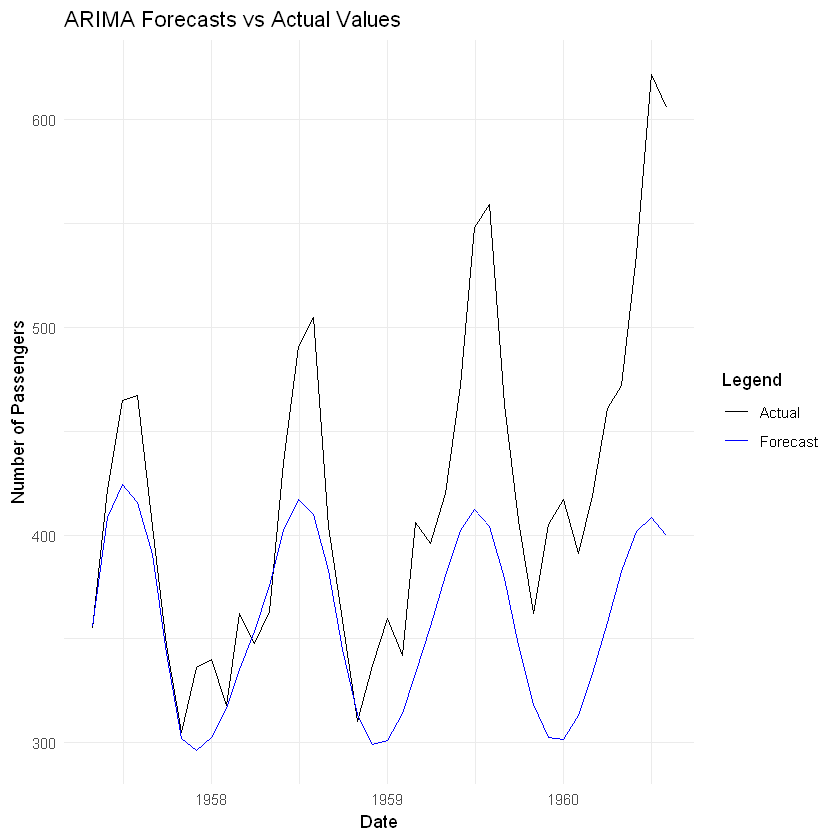

In [41]:
# Load necessary libraries
library(forecast)
library(ggplot2)
library(tseries)

# Use the PACF and ACF plots to define the values of p and q
p <- 9  # From PACF plot
q <- 3  # From ACF plot
d <- 1  # Differencing to achieve stationarity

# Perform Augmented Dickey-Fuller test to check stationarity
adf_test <- adf.test(train$value)
print(adf_test)

# If the data is not stationary, apply differencing (which is why d=1)
train_diff <- diff(train$value, differences = d)
test_diff <- diff(test$value, differences = d)

# Fit the ARIMA model with the optimal p, d, q values
arima_model <- Arima(train$value, order = c(p, d, q))

# Forecast for the test set length
arima_forecast <- forecast(arima_model, h = length(test$value))

# Convert the forecasts back to the original scale if differencing was applied
forecast_values <- arima_forecast$mean

# Create a data frame for plotting forecasts vs actual values
forecast_df <- data.frame(
  Date = test$month,
  Actual = test$value,
  Forecast = as.numeric(forecast_values)
)

# Plotting the actual values and the forecasted values
ggplot() +
  geom_line(data = forecast_df, aes(x = Date, y = Actual, color = "Actual")) +
  geom_line(data = forecast_df, aes(x = Date, y = Forecast, color = "Forecast")) +
  scale_color_manual(values = c("Actual" = "black", "Forecast" = "blue")) +
  labs(title = "ARIMA Forecasts vs Actual Values",
       x = "Date",
       y = "Number of Passengers",
       color = "Legend") +
  theme_minimal()


Question 3.11: 

1. Which models performed better? The exponential smoothing models, or the statistical models (AR, MA, ARMA, ARIMA). Why? 
2. Is this always the case? 
3. Do you think you’d get a better result if you used SARIMA? 

1. Exponential Smoothing Models performed better overall based on the provided metrics:
Triple Exponential Smoothing (TES) had:
MAE: 30.97
RMSE: 39.15
Double Exponential Smoothing (DES) had:
MAE: 59.99
RMSE: 80.94
Single Exponential Smoothing (SES) had:
MAE: 62.67
RMSE: 86.55
In contrast, while the output from the ARIMA model indicated that the series is stationary (Dickey-Fuller = -4.5791, p-value = 0.01), we do not have specific performance metrics (e.g., MAE, RMSE) for the ARIMA model to compare directly.
If the ARIMA model had higher error metrics than the TES, it would suggest that the exponential smoothing approach was more effective at capturing the data's patterns.


2. Not Always: The performance of the models can vary depending on the specific characteristics of the time series data:
Data Characteristics: In some cases, data with complex seasonal patterns or trends may be better modeled by ARIMA or SARIMA, which can lead to superior performance compared to exponential smoothing.
Model Specification: The performance of statistical models can be heavily influenced by the correct selection of parameters (p, d, q). If these parameters are not optimally chosen, ARIMA may perform poorly compared to simpler exponential smoothing models.
Therefore, while the results here suggest that exponential smoothing models performed well, it is essential to evaluate each model’s performance relative to the specific dataset.
Do you think you’d get a better result if you used SARIMA?

3. Possibly: If the time series data has seasonal patterns, implementing SARIMA could improve forecasting accuracy:
Seasonal Effects: SARIMA is explicitly designed to handle seasonal variations, which can be beneficial if such patterns exist in the data.
Complexity: If the data is seasonal and exhibits trends, SARIMA might capture these complexities better than standard ARIMA or exponential smoothing models.
To confirm whether SARIMA would outperform the other models, it would be advisable to run SARIMA on the dataset and compare its performance metrics (like MAE, RMSE) to those of the exponential smoothing and ARIMA models.

## SARIMA

Question 3.12: Implement the SARIMA model, with the optimal values of p, d, q as calculated from PACF and ACF plots previously. \
Use Seasonal Order=(2, 1, 0, 12) \
Plot the graph between forecasts and true values.

Series: train$value 
ARIMA(2,1,2) 

Coefficients:
         ar1     ar2      ma1      ma2
      0.2466  0.2464  -0.0336  -0.7168
s.e.  0.1933  0.1916   0.1472   0.1385

sigma^2 = 468.5:  log likelihood = -443.22
AIC=896.43   AICc=897.08   BIC=909.41

Training set error measures:
                   ME     RMSE     MAE      MPE     MAPE      MASE         ACF1
Training set 4.297917 21.09781 17.1789 1.496041 7.918651 0.9133788 -0.003855341

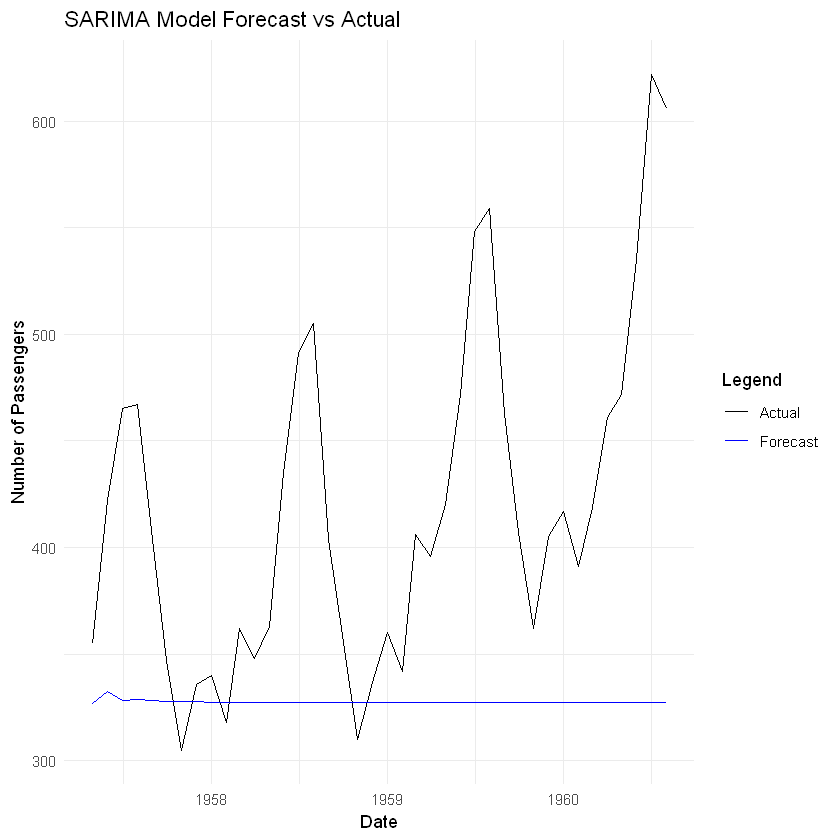

In [80]:
# Load necessary libraries
library(forecast)
library(ggplot2)

# Assuming train and test datasets are ready (train for model building, test for validation)
# Set optimal p, d, q values based on previous analysis
p <- 2  # Optimal AR order
d <- 1  # Optimal differencing order
q <- 2  # Optimal MA order
seasonal_order <- c(2, 1, 0, 12)  # Seasonal order

# Fit the SARIMA model
sarima_model <- Arima(train$value, order = c(p, d, q), seasonal = seasonal_order)

# Forecast for test period
sarima_forecast <- forecast(sarima_model, h = length(test$value))

# Create a data frame for plotting actual and forecasted values
sarima_forecast_df <- data.frame(Date = test$month, Actual = test$value, Forecast = as.numeric(sarima_forecast$mean))

# Plot SARIMA model forecast vs actual
ggplot() +
  geom_line(data = sarima_forecast_df, aes(x = Date, y = Actual, color = "Actual")) +
  geom_line(data = sarima_forecast_df, aes(x = Date, y = Forecast, color = "Forecast")) +
  scale_color_manual(values = c("Actual" = "black", "Forecast" = "blue")) +
  labs(title = "SARIMA Model Forecast vs Actual",
       x = "Date",
       y = "Number of Passengers",
       color = "Legend") +
  theme_minimal()

# Show summary of the SARIMA model
summary(sarima_model)


## Making Predictions

You have implemented multiple forecasting models, including ARIMA, SARIMA, and Exponential Smoothing, now select the **best model** and generate forecasts for the period following the training data, from the end of the training set to the end of the entire dataset.

Replace **selected_model** with the variable name of the best-performing model you have chosen. \
Note: Ensure that selected_model is replaced with the actual model variable you have selected after fitting and evaluating your models. This code will generate and plot forecasts using the chosen model, allowing you to compare them against the actual values from the test dataset.

In [ ]:
# Your answer here

Provide the code for the selected model and then uncomment the following cells one by one to make predictions, forecast, and plot the graphs.

In [ ]:
# summary(selected_model)

In [ ]:
# train_prediction <- fitted(selected_model)

In [ ]:
# plot_data <- data.frame(
#   Date = time(train_ts),
#   Actual = as.numeric(train_ts),
#   Fitted = as.numeric(train_prediction)
# )

# Plot using ggplot2
# ggplot(plot_data, aes(x = Date)) +
#   geom_line(aes(y = Actual, color = "Actual")) +
#   geom_line(aes(y = Fitted, color = "Fitted")) +
#   labs(title = "Train Data and Fitted Values",
#        x = "Date", y = "Value") +
#   scale_color_manual(values = c("Actual" = "black", "Fitted" = "blue")) +
#   theme_minimal()

In [ ]:
# df_ts <- ts(df$value, frequency = 12)

In [ ]:
# start_index <- length(train_ts) + 1
# end_index <- length(df_ts)

# Generate predictions
# prediction <- forecast(sarima_model, h = (end_index - start_index + 1))

# Rename the predictions
# prediction_df <- data.frame(prediction = as.numeric(prediction$mean))

# Optional: add index for plotting
# prediction_df$Date <- time(df_ts)[start_index:end_index]

# View the prediction
# print(prediction_df)

In [ ]:
# Convert train_ts to a data frame
# train_df <- data.frame(
#   Date = as.Date(time(train_ts), origin = "1970-01-01"),  # Extract time index and convert to Date
#   Value = as.numeric(train_ts),  # Convert ts object to numeric values
#   Type = "Train"
# )

# Ensure that train_prediction has compatible time indices
# train_prediction_df <- data.frame(
#   Date = as.Date(time(train_prediction), origin = "1970-01-01"),  # Extract time index from train_prediction and convert to Date
#   Value = as.numeric(train_prediction),  # Convert ts object to numeric values
#   Type = "Train Prediction"
# )

# Combine both data frames
# plot_data <- rbind(train_df, train_prediction_df)

# Plot using ggplot2
# ggplot(plot_data, aes(x = Date, y = Value, color = Type)) +
#   geom_line() +
#   labs(title = "Train vs Train Prediction",
#        x = "Date", y = "Value") +
#   scale_color_manual(values = c("Train" = "blue", "Train Prediction" = "red")) +
#   theme_minimal() + 
#   theme(legend.title = element_blank())

Congratulations on reaching the end of this worksheet! I hope you enjoyed it, and have an understanding of how practical time series analysis works.

Some advanced concepts for you to explore are listed below:

* One of the main errors of dealing with time-series data includes preventing lookahead. It’s extremely
important that you aren’t looking at future values to predict earlier ones. You can read more about it
here: https://bowtiedraptor.substack.com/p/look-ahead-bias-and-how-to-prevent
* Although the dataset provided to you for this worksheet was cleaned prior, real world data is extremely
dirty. Time series data especially tends to contain quite a few missing values. Try to explore some
ways of taking care of missing values in data. Some techniques include imputation, forward fills,
interpolation, moving averages, etc.
* Understanding some Classical Machine Learning techniques for Time Series Forecasting, such as Decision
Trees, Forests, Feed-forward Neural Networks, etc.
https://machinelearningmastery.com/random-forest-for-time-series-forecasting/ \
https://www.section.io/engineering-education/feedforward-and-recurrent-neural-networks-pythonimplementation/